In [1]:
import utilsNb as utils
import torch
import utilsNb as utils
from transformers import AutoTokenizer
import models
import matplotlib.pyplot as plt
import transformers

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transformers.logging.set_verbosity_error()

# reload modules
%load_ext autoreload
%autoreload 2


In [2]:
def load_sd_model(model_name, model_sd_path):
    """
    Load a pre-trained sentiment analysis model and tokenizer.

    Args:
        - model_name (str): The name of the model to load. Supported model names are:
            - "cb-512": Camembert-base model with a maximum sequence length of 512.
            - "cb-1024": Camembert-base model with a maximum sequence length of 1024.
            - "cbl-512": Camembert-large model with a maximum sequence length of 512.
            - "cbl-1024": Camembert-large model with a maximum sequence length of 1024.
        - model_sd_path (str): The file path to the saved model state dictionary.

    Returns:
        tuple: A tuple containing the loaded model and tokenizer.

    Raises:
        KeyError: If an unsupported model name is provided.

    Example:
        model, tokenizer = load_sd_model("cb-512", "/path/to/model_state_dict.pt")
    """
    
    ID_TO_LABEL = {
        0: 'non-esg',
        1: 'environnemental',
        2: 'social',
        3: 'gouvernance'
    }
    LABEL_TO_ID = {v: k for k, v in ID_TO_LABEL.items()}
    NUM_LABELS = len(ID_TO_LABEL)

    models_meta_inf = {
        "cb-512": {
            "checkpoint": "camembert-base",
            "model_class": models.ModelCB,
            "max_length": 512
        },
        "cb-1024": {
            "checkpoint": "camembert-base",
            "model_class": models.ModelCBLong,
            "max_length": 1024
        },
        "cbl-512": {
            "checkpoint": "camembert/camembert-large",
            "model_class": models.ModelCBL,
            "max_length": 512
        },
        "cbl-1024": {
            "checkpoint": "camembert/camembert-large",
            "model_class": models.ModelCBLlong,
            "max_length": 1024
        }
    }
    
    checkpoint = models_meta_inf[model_name]["checkpoint"]
    model_class = models_meta_inf[model_name]["model_class"]
    
    TOKENIZER = AutoTokenizer.from_pretrained(checkpoint,)
    model = model_class(checkpoint, NUM_LABELS, id2label=ID_TO_LABEL)
    model.load_state_dict(torch.load(model_sd_path, map_location=torch.device('cpu')))
    
    print(f"Model {model_name} loaded.")
    
    return model, TOKENIZER
    
    




In [3]:
model_cb, tokenizer_base = load_sd_model("cb-512",model_sd_path='../models/model-cb/run1/models/state_dict/model_cb_sd.pt')
model_cb_1024, _ = load_sd_model("cb-1024",model_sd_path='../models/model-cb-long/run1/models/state_dict/camembert_long_state_dict.pt')
model_cbl, tokenizer_large = load_sd_model("cbl-512",model_sd_path='../models/model-cbl/run1/models/state_dict/cb_large_model1_sd.pt') 
model_cbl_1024, _ = load_sd_model("cbl-1024",model_sd_path='../models/model-cbl-long/run1/models/state_dict/cbl_model_long_sd.pt')

Model cb-512 loaded.
Model cb-1024 loaded.
Model cbl-512 loaded.
Model cbl-1024 loaded.


In [4]:
pdf_path = "../data/ccpv231211.pdf"
pvp = utils.PvParser(pdf_path)

text = pvp.read_pv()
pv_df_1024 = pvp.pv_to_df(chunk_size=1024)
pv_df_512 = pvp.pv_to_df(chunk_size=512)

In [5]:
res_df = utils.predict_df(pv_df_512, model_cbl, tokenizer_large, tokenizer_max_len=512, return_prediction_only=True, column_name="cbl_pred")
res_df = utils.predict_df(res_df, model_cbl_1024, tokenizer_large, tokenizer_max_len=1024, return_prediction_only=True, column_name="cbl_1024_pred")
res_df

100%|██████████| 266/266 [01:20<00:00,  3.32it/s]


,section_number,text,cbl_pred,cbl_1024_pred
0,1,1. \n\nAppel : \n\n93 Conseillères et Conseil...,non-esg (0.999),gouvernance (0.726)
1,2,2. \n\nProcès-verbal de la séance du 13 novemb...,non-esg (0.989),non-esg (0.89)
2,3,3. \n\nApprobation de l’ordre du jour \n\nM. l...,non-esg (0.999),non-esg (0.44)
3,4,4. \n\nCommunications du Bureau \n\n• M. le ...,non-esg (0.797),gouvernance (0.992)
4,4,"Or, il a appris ce matin qu’un membre du Conse...",non-esg (0.999),gouvernance (0.859)
...,...,...,...,...
261,20,"Au sein de la Municipalité \n\nDès mars 2023, ...",non-esg (0.993),social (0.909)
262,20,Je tiens à remercier très sincèrement mes coll...,non-esg (0.999),non-esg (0.991)
263,20,Notre compliment à Marco Carenza qui a parfait...,non-esg (0.955),environnemental (0.546)
264,20,Vision pour l’avenir \n\nMalgré une situation ...,environnemental (0.987),environnemental (0.999)


In [6]:
res_df.to_csv("pv2312_512_predictions.csv")

In [11]:
res_df2 = utils.predict_df(pv_df_1024, model_cbl, tokenizer_large, tokenizer_max_len=512, return_prediction_only=True, column_name="cbl_pred")
res_df2 = utils.predict_df(res_df2, model_cbl_1024, tokenizer_large, tokenizer_max_len=1024, return_prediction_only=True, column_name="cbl_long_pred")
res_df2

100%|██████████| 129/129 [01:04<00:00,  2.01it/s]


,section_number,text,cbl_pred,cbl_long_pred
0,1,1. \n\nAppel : \n\n93 Conseillères et Conseil...,non-esg (0.999),gouvernance (0.726)
1,2,2. \n\nProcès-verbal de la séance du 13 novemb...,non-esg (0.989),non-esg (0.89)
2,3,3. \n\nApprobation de l’ordre du jour \n\nM. l...,non-esg (0.999),non-esg (0.44)
3,4,4. \n\nCommunications du Bureau \n\n• M. le ...,non-esg (0.998),gouvernance (0.734)
4,5,5. \n\nCommunications municipales \n\nM. le M...,environnemental (0.999),non-esg (0.912)
...,...,...,...,...
124,20,On peut en effet souligner que la Municipalité...,environnemental (0.999),environnemental (1.0)
125,20,A relever les quelques festivités et célébrati...,non-esg (1.0),non-esg (0.772)
126,20,A souligner l’étape marquante de l’adoption du...,social (0.703),social (0.997)
127,20,Je tiens à remercier très sincèrement mes coll...,non-esg (0.999),non-esg (0.992)


In [ ]:
res_df2.to_csv("pv2312_1024_predictions.csv")

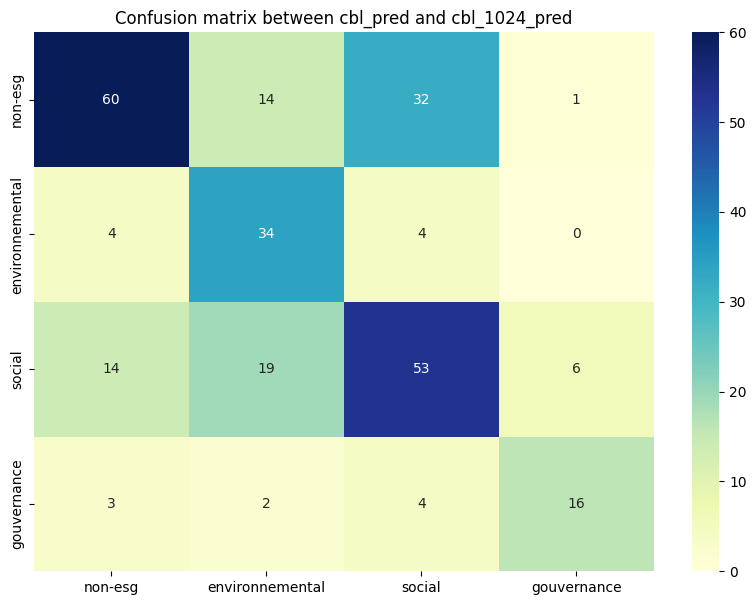

In [21]:
# confusion matrix between cbl_pred and cbl_1024_pred
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

conf_matrix = confusion_matrix(res_df["cbl_pred"], res_df["cbl_1024_pred"])
conf_matrix = pd.DataFrame(conf_matrix, index = ["non-esg", "environnemental", "social", "gouvernance"], columns = ["non-esg", "environnemental", "social", "gouvernance"])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu")
plt.title("Confusion matrix between cbl_pred and cbl_1024_pred")
plt.show()